<a href="https://colab.research.google.com/github/ebbethke/GIB_Sim/blob/master/CICOM%20Endocrine%20Glucose%20Regulation%20Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter Notebooks and This Exercise

## Welcome!

### Q: What is this?
### A:
This is a Jupyter Notebook, a web interface that can run live code (in this case Python3), display text, and run other visualizations.  It allows us to build a much richer experience working through computational models.  Best of all: the code runs on the server.  No installing software!  No downloading code!  No VPN!

### Q: Why aren't we running this on MATLAB/Octave like before?
### A: 
Good question. The purpose of these simulations isn't really to learn the math, or understand the capabilities of a technique like in sessions past (think: Machine Learning...). For that reason, we looked into a more visual way to work with these models. As a bonus, we can bypass all the klunkiness of having you download zip folders of code and troubleshooting software installs.

### Q: What am I supposed to do with this?
### A: 
We've pulled together a bunch of clinical reference text so you could use this as a study guide of sorts; we feel the optional references included provide a very good overview of the systems covered in these books.  Also, the code is live, so you can tweak and run it as you want to get an even better understanding of how these complex organ models work.  People who use Jupyter Notebooks in the real world often use these notebooks to collaborate, document, and develop new tools, techniques and more. 

### Q: What do I need to do to get started?
### A:
Not much.  Up at the top bar, there is a button labeled, "Run" with a Next/Play/Skip icon.  You need to run all the cells with code in them.  Run a cell by clicking it once so it highlights in blue.  Then click "Run".  Start at the top and work your way down.  The first set of code containing cells have functions used by all the rest of the code. Later on, we start graphing the output.  Each cell with a graph includes **All** the parameters used in the simulation, so you can change them wherever; no need to scroll around looking for a variable. If you do change variables or other code in a cell, you need to re-run that cell and any others that use that cell for it to update. That's it!   

### Q: Are there any other things I should know about?
### A: 
Yes.  
1. We've capped the RAM you can use, you can see how much you're using at the top right.  If you've maxed out, close some books.
2. In order to protect the books from being accidentally destroyed or changed by one person, you cannot save or download the reference books.  This means if you want to make changes and save them, you need to make your own personal copy first.  Follow these steps:

A. From the 'Home' screen, in the top right choose "New" > "Terminal"

B. You should now see a command line.  Copy and paste the following command EXACTLY:


```cp -r /srv/data/Notebooks ~/MyCopies```

and hit enter.  You can check if it worked by entering the following command:

```ls ~/MyCopies/Notebooks```

and hit enter.  You should see each notebook plus the img folder. That folder is now your personal copy, and you should be able to change and download copies of it.


## Let's get started!
-----

# Glucose, Insulin, and Beta-Islet Cell Mass

### Introduction
In this notebook, we'll walk through one model of how glucose, insluin, and beta-islet cell mass are dynamically related over multiple timescales.  As you navigate, each section of text and code is called a 'cell'.  You will have to run all the cells with code in them for the simulation to work.  To run a cell, simply click it, and then click the **Run** button at the top.

The purpose of walking through the code is to provide a better understanding of how these levels are related and give you a stronger understanding of the mechanisms that produce the symptoms of diabetes mellitus types I & II.  Later on, you can manipulate the initial conditions and the behavior of the model to see what happens to each metabolite level which should illustrate how relatively straightforward feedback mechanisms and dynamical relationships can manifest into complex metabolic behaviors.

<center> <h3>Here's a snapshot of a human insulin receptor (blue) and insulin (red):</h3> 
<img src="https://github.com/ebbethke/GIB_Sim/blob/master/img/insulin_receptor.png?raw=1" alt="Drawing" width="300"/>
</center>

<center><h3>Here's an interactive 3D model of insulin:</h3><a href="https://pdb101.rcsb.org/motm/14">Source</a></center>  


In [26]:

from IPython.display import IFrame
from IPython.core.display import HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
IFrame('https://pdb101.rcsb.org/motm/jmol/?id=14', width=600, height=875, embed=True) 

<center> <h3>Here's an interactive 3D model of the insulin receptor's internal kinase:</h3><a href="http://pdb101.rcsb.org/motm/182">Source</a> </center>

In [2]:
IFrame('https://pdb101.rcsb.org/motm/jmol/?id=182&jmolId=1', width=600, height=825, embed=True)

# Reference Information

These notebooks allow for integration of multiple resources into one, dynamic location.  To that end, we've identified some clinical knowlege reference materials you can explore if that would help your understanding of this model.  You may have to be on the intranet at U of I to access some of these resources without logging in.

## The Endocrine Pancreas

<center>
<img src="https://github.com/ebbethke/GIB_Sim/blob/master/img/Glucose_Insulin_Cell.png?raw=1" title="Glucose Stimulation of B-cell Insulin Release" width="400"/>
</center>

### Overview of the pancreatic physiology:

[Medical Physiology: The Big Picture Chapter 8) Endocrine Physiology, section: blood glucose testing](https://accessmedicine.mhmedical.com/content.aspx?sectionid=75577697&bookid=1291&jumpsectionid=75577955&Resultclick=2#1106603185)

[Ganong's Review of Medical Physiology Chapter 24) Endocrine Functions of the Pancreas & Regulation of Carbohydrate Metabolism, section: glucose tolerance](https://accessmedicine.mhmedical.com/content.aspx?sectionid=204296197&bookid=2525&jumpsectionid=204296259&Resultclick=2)

[Greenspan's Basic and Clinical Endocrinology Chapter 17) Pancreatic Hormones and Diabetes Mellitus, section: insulin receptors and insulin action](https://accessmedicine.mhmedical.com/content.aspx?sectionid=166251965&bookid=2178&jumpsectionid=166251998&Resultclick=2#1144818387)

[Endocrine Physiology Chapter 7) Enocrine Pancreas, section: pancreatic hormones](https://accessmedicine.mhmedical.com/content.aspx?sectionid=183488649&bookid=2343&jumpsectionid=183488658&Resultclick=2#1160649977)

<center>
<img src="https://github.com/ebbethke/GIB_Sim/blob/master/img/Insulin_MOA.png?raw=1" title="Insulin Mechanism of Action" width= "400"/>
</center>

## Diagnostic Criteria

<img src="https://github.com/ebbethke/GIB_Sim/blob/master/img/Diabetes_Diagnosis_Criteria.png?raw=1" title="Laposata's Laboratory Medicine: Diagnosis of Disease in the Clinical Laboratory, 3e > Pancreatic Disorders" style="width: 700px;"/>

<img src="https://github.com/ebbethke/GIB_Sim/blob/master/img/PreDiabetes_Criteria.png?raw=1" title="Laposata's Laboratory Medicine: Diagnosis of Disease in the Clinical Laboratory, 3e > Pancreatic Disorders" style="width: 700px;"/>

## Description of the Model
Now onto the model itself!  

The reference paper for the governing equations for the simulation is [1 Topp et al](#Bibliography), who modeled the kinetics of glucose, insluin and beta-islet cell mass.  The governing equations are a system of partial differential equations that defines the behavior of our parameters Glucose, $G$; Insulin, $I$; and Beta-Islet Cell Mass, $\beta$ over time, $t$ .  There are two timescales used in the simulation; two fast timescale relationships between insulin and glucose, and a slower relationship of beta-islet cells and glucose levels.  The paper details how the equations were developed in more detail, but here's the punchline:

#### "Fast" Governing Equations
$$ \begin{align}
\frac{dG}{dt}\,=\,R_{0} - (E_{G0} + S_{I}I)G \qquad  &  R_{0}\textsf{: net G production, }  E_{G0}\textsf{: G effectiveness, } S_{I} \textsf{: I sensitivity}\\[10pt]
\frac{dI}{dt}\,=\,\frac{\beta \sigma G^{2}}{\alpha + G^{2}} - kI \qquad  & \sigma \textsf{: insulin secretion rate, }\alpha \textsf{: Hill equation coeff, } k\textsf{: insulin clearance}\\[10pt]
\end{align}
$$ 

#### "Slow" Governing Equations 
$$ \begin{align}
\frac{d\beta}{dt}\,=\,(-d_0 + r_{1}G - r_{2}G^{2})\beta \qquad & r_{1,2}\textsf{: rate constants, }d_{0}\textsf{: cell death rate}\\[10pt] 
\end{align}
$$ 

What are the [Hill equations](https://en.wikipedia.org/wiki/Hill_equation_(biochemistry) "link to Wiki")? Here's a snippet from Wikipedia:
>*"In biochemistry and pharmacology, the Hill equation refers to two closely related equations that reflect ligands binding to macromolecule. The distinction between the two equations is whether they measure occupancy (the fraction of a macromolecule saturated by ligand) or response (the physiological output of the system, such as muscle contraction). Both equations are a function of the ligand concentration."*

However, be warned (also from Wiki):
>*"Unlike more complex models, the relatively simple Hill-Langmuir equation provides little insight into underlying physiological mechanisms of protein-ligand interactions. This simplicity, however, is what makes the Hill-Langmuir equation a useful empirical model, since its use requires little* a priori *knowledge about the properties of either the protein or ligand being studied."*

So the $\frac{G^{2}}{\alpha + G^{2}}$ term in the $\frac{dI}{dt}$ equation is the Hill equation. Here's what the response curves look like for different Hill coefficients (the **n** here is $\alpha$ in our model):

<center>
<img src="https://github.com/ebbethke/GIB_Sim/blob/master/img/Hill_Curves.jpg?raw=1" align="center" width= "500"></img>
</center>

## A Word Regarding Timescales and the Importance of Kinetics in Simulations
If the system being modelled operates at various timescales, it's important to reflect that in the simulation. Simulating a timestep much bigger or much smaller than is assumed by your governing equations will likely not produce useful results, because you are essentially extrapolating the behavior well beyond what is modelled.

In this model, there are two main timescales being considered; the fast is on the order of minutes and slow is days/months.  The fast timescale output drives the slow one. In general, longer timesteps for the fast (.0035 - .004) will result in overshoot and the insulin response will oscillate unreasonably. Shorter timescales (.001-.002) will cause the insulin levels to track very closely with glucose levels, as if there is an instantaneous metabolic reaction time.

Because we're dealing with two drastically different timescales, we've written two main looping functions; one to go over the faster timescale and one to go over the slower timescale.  we can use these in tandem to get information about how the glucose/insulin regulation (fast timescale) can change the behavior of the pancreas over time (slow timescale).

Here's a diagram showing what's going on:
<center>
<img src="https://github.com/ebbethke/GIB_Sim/blob/master/img/GIBCyclePic.png?raw=1" title="Simulation Fast and Slow Cycles Image" width="300"/>
</center>

You can picture the "Fast" feedback cycle (red and blue) spinning quickly, while the "Slow" cycle (green) spins very slowly.

## Setup
For this simulation, we'll be using a decent number of parameters that will not change over the course of the simulation. Now, in reality, these parameters likely fluctuate due to other complex interactions and won't *really* be constant as we assume here. For now, we'll consider those behaviors to be beyond the scope of this simulation, and reasonably captured by our emprical modeling.  

In [18]:
from IPython.display import IFrame
from IPython.core.display import HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

%matplotlib inline
import matplotlib.pyplot as plt
import gc
""" Initializes static parameters and evals them to global scope """
# Note: in Python, global scope is read-only unless named in narrower scope as global.  

# plotting constants
newfig = 0
red   = '#D40000'
blue  = '#000080'
green = '#008000'

# simulation duration and scale parameters 
fast_cycles = 333  # num iterations time steps to take
timescale = 0.003  # days
slow_cycles = 365  # num iterations for longer term time scales
meals_per_day = 3  # meals per day

## Biometric parameters
# Used in glucose rate equation:
S_i = 0.72  # ml / uU d Total insulin sensitivity
E_gzero = 1.44  # 1 / d Glucose effectiveness at zero insulin
R_zero = 864  # mg / dl d Net rate of glucose production at zero glucose

# Used in insulin rate equation:
sigma = 43.2  # uU / ml d Maximal insulin secretion rate from Beta-islet cells
alpha = 20000  # mg^2 / dl^2 Apparent dissociation constant for glucose
k = 432  # 1 / d  Clearance constant  combined insulin uptake at liver and kidneys and insulin receptors

# Used in Beta-islet cell mass equation:
d_zero = 0.06  # 1 / d Beta cell death rate at zero glucose
r_1 = 8.4 * 10**(-4)  # dl / mg d Linear constant modeling Beta cell replication and death
r_2 = 2.4 * 10**(-6)  # dl^2 / mg^2 d Quadratic constant modeling Beta cell replication and death
    
    

## Governing Equations as Functions
The governing equations have been turned into functions we can call to get an updated rate for each parameter.  Assuming we have a starting value, $x$, for each parameter we can follow this general method: 
$$1. \quad rate\,=\,\mbox{update_X}(x) \\[4pt]$$
$$2. \quad rate\,\times\,time\,=\,\Delta x \\[4pt] $$
$$3. \quad x\,=\,x\,+\,\Delta x \\[4pt] $$
where $x$ would be either $G$, $I$, or $\beta$. We iterate through steps 1-3 over and over to find new values of $x$ over time and plot them. 

Here are each of the governing equations written as functions:


$$\frac{dG}{dt}\,=\,R_{0} - (E_{G0} + S_{I}I)G $$

In [19]:
def update_G(G, I, E_gzero, R_zero, S_i):
    """ Takes in current values for glucose and insulin and returns an updated glucose level """
    # R_zero  - net rate of production at zero glucose.  mg / (dl d)
    # E_gzero - glucose effectiveness at zero insulin. 1 / d
    # S_i     - insulin sensitivity for production and uptake. ml / (uU d)
    
    dGdt = R_zero - (E_gzero + S_i * I) * G
    return dGdt

$$\frac{dI}{dt}\,=\,\frac{\beta \sigma G^{2}}{\alpha + G^{2}} - kI $$

In [20]:
def update_I(G, I, B, alpha, k, sigma):
    """ Takes in current values for glucose and beta cell mass and insulin and returns insulin rate. """
    # sigma - Beta cell insulin secretion rate. uU / (ml d) 
    # alpha - dissociation constant of glucose from insulin mg^2 / dl^2
    # k     - combined clearance from liver, kidneys, insulin receptors. 1 / d 

    dIdt = ((B * sigma * G**2) / (alpha + G**2)) - k*I
    return dIdt

$$\frac{d\beta}{dt}\,=\,(-d_0 + r_{1}G - r_{2}G^{2})\beta $$

In [21]:
def update_B(G, B, d_zero, r_1, r_2):
    """ Takes in current levels of gucose and beta cell mass and returns the rate of beta cell mass. """
    # d_zero - death rate at zero glucose
    # r_1    - linear constant defining Beta cell death mechanics
    # r_2    - quadratic constant defining Beta cell death mechanics

    dBdt = (-d_zero + (r_1 * G) - (r_2 * G**2)) * B
    return dBdt

```localmins()``` is a helper function to grab minima from lists, no smoothing.  You don't need to understand this if you don't want, but it needs to be run here to be callable from our simulation.

In [22]:
def localmins(A):
    """ Returns local minima of a list. """  
    # Will return [] if A not subscriptable, A too short, or no mins 
    try:
        enum = enumerate(A[1:-1])
        return [e for (i,e) in enum if A[i] > e < A[i+2]]
    except TypeError as e:
        return []  


## The "Fast" Equations
Here is the function that manage the updating of $G$ and $I$ values over time.  First, we define our fast loop to update $G$ and $I$ over relatively short timescales (~5min).  That's this part of our cycle:

<center>
<img src="https://github.com/ebbethke/GIB_Sim/blob/master/img/GIBFastCycleSmall.png?raw=1" title="Simulation Fast Cycles Image" width="250"/>
</center>

In [23]:
def run_fast_timescale(G_init, I_init, B_init):
    """ Iterates over G and I value changes in time, given starting values.  Returns all values in a list"""
    # Initialize return vars
    G_vals = [0] * fast_cycles
    I_vals = [0] * fast_cycles
    
    # Initialize temp variables updated in loop.
    # We keep 2 copies of G and I because they 'chase' each other
    # getting updated in the loop.
    G_new  = G_init
    I_new  = I_init
    G      = G_init
    I      = I_init
    B      = B_init

    # Now we spin our red and blue cycle
    for fast_cycle in range(fast_cycles):
       
        # current G level set to previously updated
        G = G_new
        # note we use the "old" I value.
        dG = update_G(G, I, E_gzero, R_zero, S_i)
        
        # multiply rate by time to get change
        dG = dG * timescale
        
        # prevent impossible things
        G_new = max(0, G + dG)
            
        # save new value to return variable
        G_vals[fast_cycle] = G_new

        
        # repeat exact same thing as above for I, but note we use the "old" G value.
        I = I_new
        dI = update_I(G, I, B, alpha, k, sigma)
        
        dI = dI * timescale
        
        I_new = max(0, I + dI)
            
        I_vals[fast_cycle] = I_new

        # daily intake of carbohydrates and sugars raise blood glucose levels sharply
        if not fast_cycle % int(1.0 / (timescale * meals_per_day)):
            G_new = G_new + 50; 
    
    # create times (in hours, hence the 24) for each calculated value
    t_vals = [i * timescale * 24 for i in range(fast_cycles)]
        
       
        
    return [t_vals, G_vals, I_vals]


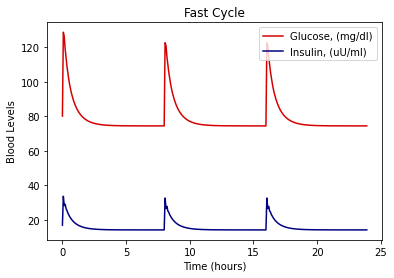

In [27]:

G_init = 80  # mg/dl plasma glucose level, initial
I_init = 12  # uU/ml plasma insulin level, initial
B_init = 650  # mg mass of Beta-islet cells in the pancrease, initial

d_zero = 0.05  #  1 / d Beta cell death rate at zero glucose
S_i    = 0.72  # ml / uU d Total insulin sensitivity
r_1 = 8.4 * 10**(-4)  # dl / mg d Linear constant modeling Beta cell replication and death
r_2 = 2.4 * 10**(-6)  # dl^2 / mg^2 d Quadratic constant modeling Beta cell replication and death
sigma = 43.2  # uU / ml d Maximal insulin secretion rate from Beta-islet cells
alpha = 20000  # mg^2 / dl^2 Apparent dissociation constant for glucose
k = 432  # 1 / d  Clearance constant  combined insulin uptake at liver and kidneys and insulin receptors

# params: initial Glucose level, initial Insulin level, initial Beta cell mass, display graph (bool, optional)
[ts, Gs, Is] = run_fast_timescale(G_init, I_init, B_init)

plt.figure(1)
plt.title('Fast Cycle')
plt.plot(ts, Gs, red, ts, Is, blue)
plt.xlabel('Time (hours)')
plt.ylabel('Blood Levels')
plt.legend(['Glucose, (mg/dl)', 'Insulin, (uU/ml)'])
# plt.show()
a = gc.collect()

## Fast Cycle Output and Analysis
To change parameters: go to the cell and make a change, then click the **Run** button at the top.  Each cell you change you have to **Run** if you want it to change.

Figure 1 represents a normal, healthy case of ~ 1 day of glucose and insulin levels.  From what you can see, it should be clear we assume 3 meals per day, each with the same glycemic load.  This will make studying the longer time scale system more clear, but carries with it unrealistic assumptions.  Keep in mind this and other limitations may exist in our model, but the overall trends should be representative.

## Longer Timescales and the Beta-islet Cell Mass
Now what we can do is use our fasting levels for glucose and insulin from our fast cycle and over time, update the Beta-islet cell mass. We do this by running the "Fast" cycle and grabbing the minima, and then averaging all the minima together. Those average values drive the "Slow" cycle.  Visually, this is the red arrow feeding the green cycle.

When we get a new $\beta$ value from the "Slow" cycle, we use that value as $B$ for the next running of the "Fast" cycle.  Visually, this is the green arrow that feeds into the blue half of the fast cycle on the diagram. We repeat this process of running the "Fast" then "Slow" cycles in this manner for ```slow_cycles``` number of iterations.  We started here by looking at one year, or 365 days.

<center>
<img src="https://github.com/ebbethke/GIB_Sim/blob/master/img/GIBCyclePic.png?raw=1" alt="Drawing" width="300"/>
</center>


In [10]:
def run_slow_timescale(G_init, I_init, B_init, S_i_factor=1, d_zero_factor=1):
    global S_i, d_zero
    # initialize all our return variables
    B_vals_slow = [0] * slow_cycles
    G_vals_slow = [0] * slow_cycles
    I_vals_slow = [0] * slow_cycles
    G_slow      = G_init
    I_slow      = I_init
    B_slow      = B_init
    
    for slow_cycle in range(slow_cycles):
        # run a "Fast" cycle for a day and get a fasting level from values returned
        [ts, Gs, Is] = run_fast_timescale(G_slow, I_slow, B_slow)
        
        # get minima (lowest fasting values)
        fasting_glucose = localmins(Gs)
        fasting_insulin = localmins(Is)
        
        # get averages and prevent impossible things
        G_slow = sum(fasting_glucose)/len(fasting_glucose) if len(fasting_glucose) > 0 else G_slow
        I_slow = sum(fasting_insulin)/len(fasting_insulin) if len(fasting_insulin) > 0 else I_slow
        
        # save values for plotting later
        G_vals_slow[slow_cycle] = G_slow
        I_vals_slow[slow_cycle] = I_slow
        
        # run a slower timescale and get changes to beta cell mass
        dB = update_B(G_slow, B_slow, d_zero, r_1, r_2)
        dB = dB * timescale * fast_cycles
        B_slow = B_slow + dB
        B_vals_slow[slow_cycle] = B_slow
        
        # update sensitivity and cell death
        S_i = S_i * S_i_factor
        d_zero = d_zero * d_zero_factor
       
    
    t_vals_slow  = [i * timescale * fast_cycles for i in range(slow_cycles)]
    
    return [t_vals_slow, G_vals_slow, I_vals_slow, B_vals_slow]

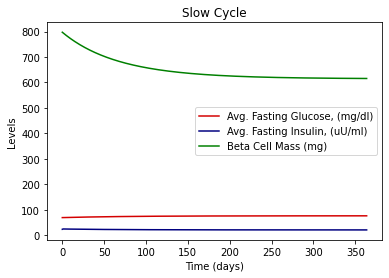

In [28]:
G_init = 80  # mg/dl plasma glucose level, initial
I_init = 6  # uU/ml plasma insulin level, initial
B_init = 800  # mg mass of Beta-islet cells in the pancrease, initial

d_zero = 0.05  #  1 / d Beta cell death rate at zero glucose
S_i    = 0.72  # ml / uU d Total insulin sensitivity
r_1 = 8.4 * 10**(-4)  # dl / mg d Linear constant modeling Beta cell replication and death
r_2 = 2.4 * 10**(-6)  # dl^2 / mg^2 d Quadratic constant modeling Beta cell replication and death
sigma = 43.2  # uU / ml d Maximal insulin secretion rate from Beta-islet cells
alpha = 20000  # mg^2 / dl^2 Apparent dissociation constant for glucose
k = 432  # 1 / d  Clearance constant  combined insulin uptake at liver and kidneys and insulin receptors

# params: initial Glucose level, initial Insulin level, initial Beta cell mass, insulin factor multiplier (optional), beta cell death rate multiplier (optional)
# the optional params at the end are multiplied with S_i and d_zero, respectively at the end of each cycle (~1 day).
# You can change those parameters and see how it impacts glucose metabolism. They are very sensitive, change by orders of 0.001
[ts, Gs, Is, Bs] = run_slow_timescale(G_init, I_init, B_init, 1, 1)

plt.figure(2)
plt.title('Slow Cycle')
plt.plot(ts, Gs, red, ts, Is, blue, ts, Bs, green )
plt.xlabel('Time (days)')
plt.ylabel('Levels')
plt.legend(['Avg. Fasting Glucose, (mg/dl)', 'Avg. Fasting Insulin, (uU/ml)', 'Beta Cell Mass (mg)'])
# plt.show()
a = gc.collect()

## Discussion
The levels displayed in Figure 2 look fairly normal for fasting averages from what we can find as far as reference ranges, summarized from multiple literature sources below. Make sure it makes sense why the $\beta$ cell mass would drop given the other parameter values.  

As for the reference ranges of normal glucose and insulin levels, here's a chart adapted from Table 1 of [2 Tirosh et al](#Bibliography "Go To Bib") showing age-adjusted baseline blood glucose levels in men:

<table border="1" class="docutils">
<colgroup>
<col width="20%">
<col width="16%">
<col width="16%">
<col width="16%">
<col width="16%">
<col width="16%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head" style="text-align:left;">Characteristic</th>
<th class="head">Quintile 1 (N=2529)</th>
<th class="head">Quintile 2 (N=2545)</th>
<th class="head">Quintile 3 (N=2598)</th>
<th class="head">Quintile 4 (N=2719)</th>
<th class="head">Quintile 5 (N=2772)</th>    
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td style="text-align:left; font-weight: bold">Mean Fasting Plasma Glucose</td>
<td> 76.4 &#177; 4.5 mg/dl</td>
<td> 84.2 &#177; 1.4 mg/dl</td>
<td> 88.6 &#177; 1.1 mg/dl</td>
<td> 92.5 &#177; 1.1 mg/dl</td>
<td> 96.9 &#177; 1.4 mg/dl</td>    
</tr>
<tr class="row-odd"><td style="text-align:left; font-weight: bold">Range Fasting Plasma Glucose</td>
<td> 50 - 81 mg/dl</td>
<td> 82 - 86 mg/dl</td>
<td> 87 - 90 mg/dl</td>
<td> 91 - 94 mg/dl</td>
<td> 95 - 99 mg/dl</td>    
</tr>
<tr class="row-even"><td style="text-align:left; font-weight: bold">Age (yr)</td>
<td> 32.4 &#177; 4.6 mg/dl</td>
<td> 32.6 &#177; 4.8 mg/dl</td>
<td> 32.5 &#177; 4.7 mg/dl</td>
<td> 32.6 &#177; 4.8 mg/dl</td>
<td> 33.0 &#177; 4.7 mg/dl</td>    
</tr>
</tbody>
</table>

$$\\
\\[10pt]$$

<center>
<img src="https://github.com/ebbethke/GIB_Sim/blob/master/img/Diabetes_Chart.png?raw=1" title="Glucose Levels for Diagnosis of Diabetes" height="450"/>
</center>

Also this insulin reference range taken from [MedScape](https://emedicine.medscape.com/article/2089224-overview):

<table border="1" class="docutils">
<colgroup>
<col width="41%">
<col width="59%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Condition</th>
<th class="head">Value(s)</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>Fasting</td>
<td> &#60;25 uU/ml</td>
</tr>
<tr class="row-odd"><td>30 min Post Glucose</td>
<td>30 - 230 uU/ml</td>
</tr>
<tr class="row-even"><td>120 min Post Glucose</td>
<td>16 - 166 uU/ml</td>
</tr>
</tbody>
</table>


## A Note about Fasting State:
From, "Pathophysiology of Disease: An Introduction to Clinical Medicine":
> After an overnight fast, the liver plays a primary role in maintaining blood glucose by producing glucose at the same rate at which it is used by resting tissues. Glucose uptake and use occur predominantly in tissues that do not require insulin for glucose uptake, such as the brain. Hepatic glucose output is stimulated by glucagon and is primarily a result of glycogenolysis, which can provide, on average, an 8-hour supply of glucose. The low levels of insulin present (basal secretion of 0.25–1.0 unit/h) are insufficient to block the release of fatty acids from fat, which provide fuel for muscles (fatty acid oxidation) and substrate for hepatic ketogenesis. However, these levels of insulin are sufficient to prevent excessive lipolysis, ketogenesis, and gluconeogenesis, thus preventing hyperglycemia and ketoacidosis.



## Exploring Pathways into Diabetes
Now that you've seen the model and have a sense for how it works, consider how diabetes might manifest as changes to parameters of our model.  If we define diabetes as *"...a persistent hyperglycemia..."* [1 Topp et al](#Bibligraphy "Go To Bib"), there are several ways we could induce that chronic condition in our model. The paper explores three main ways diabetes could manifest: **Regulated Hyperglycemia**, **Bifurcation**, and **Dynamical Hyperglycemia**. We'll walk through each mechanism, then model the described phenomena by simply changing parameter values in the code to see what affect they have on the system as a whole.  The block quotes here are taken from [1 Topp et al](#Bibligraphy "Go To Bib").  

## Regulated Hyperglycemia
>*Defects in $\beta$-cell mass regulation can shift the
physiological fixed point to a hyperglycemic
level. Since steady-state glucose levels are determined
by $\beta$-cell mass dynamics, there are two
possible ways to shift the physiological fixed
point to a hyperglycemic level: (1) a defect in
$\beta$-cell mass regulation, or (2) a loss of $\beta$-cell mass
regulation combined with a defect in glucose
and/or insulin dynamics. Small defects in any of
the $\beta$-cell mass parameters, for example a decrease
in the response of replication and/or an
increase in the response of death rates to glucose,
cause the physiological fixed point to shift to
a hyperglycemic level [Fig. 4(a)]. The $\beta$-cell mass
is responsive to changes in plasma glucose concentrations
and has a basin of physiological
attraction, but the physiologically regulated
glucose level is now hyperglycemic.*

![Fig 4(a)](img/GIBfig4a.png "Figure 4 (a)")
<center>Figure 4.  x-axis is Insulin level, uU/ml </center>

>*A second way to shift the physiological fixed
point to a hyperglycemic level is to couple a loss
of $\beta$-cell mass regulation to an abnormality in
glucose and/or insulin dynamics. Setting each of
the $\beta$-cell mass parameters to zero yields equal
replication and death rates at all glucose levels,
and as a result, the $\beta$-cell mass becomes nonresponsive.*


<h1 style="color:purple;"> I. Coupled Regulated Hyperglycemia </h1>

### Simulating Regulated Hyperglycemia: High Beta Cell Death Rate
Even though the Beta cell mass will be responsive to changes in glucose over time, an increase in the base death rate for Beta cells will shift the equilibrium higher.  This could represent the result of an autoimmune response that increases the cell death rate on average.  We simulate this shift by increasing ```d_zero``` from 0.05 to 0.072 (1 / days).

In [12]:
G_init = 90  # mg/dl plasma glucose level, initial
I_init = 6  # uU/ml plasma insulin level, initial
B_init = 800  # mg mass of Beta-islet cells in the pancrease, initial

""" We are increasing d_zero, the cell death rate of Beta cells from 0.05 -> 0.072 
to simulate regulated hyperglycemia. """
d_zero = 0.072  #  1 / d Beta cell death rate at zero glucose
S_i    = 0.72  # ml / uU d Total insulin sensitivity
r_1 = 8.4 * 10**(-4)  # dl / mg d Linear constant modeling Beta cell replication and death
r_2 = 2.4 * 10**(-6)  # dl^2 / mg^2 d Quadratic constant modeling Beta cell replication and death
sigma = 43.2  # uU / ml d Maximal insulin secretion rate from Beta-islet cells
alpha = 20000  # mg^2 / dl^2 Apparent dissociation constant for glucose
k = 432  # 1 / d  Clearance constant  combined insulin uptake at liver and kidneys and insulin receptors

# params: initial Glucose level, initial Insulin level, initial Beta cell mass, insulin factor multiplier (optional), beta cell death rate multiplier (optional)
# the optional params at the end are multiplied with S_i and d_zero, respectively at the end of each cycle (~1 day).
# You can change those parameters and see how it impacts glucose metabolism. They are very sensitive, change by orders of 0.001
[ts, Gs, Is, Bs] = run_slow_timescale(G_init, I_init, B_init, 1, 1)

plt.figure(3)
plt.title('Slow Cycle: High B-cell Death')
plt.plot(ts, Gs, red, ts, Is, blue, ts, Bs, green )
plt.xlabel('Time (days)')
plt.ylabel('Levels')
plt.legend(['Avg. Fasting Glucose, (mg/dl)', 'Avg. Fasting Insulin, (uU/ml)', 'Beta Cell Mass (mg)'])
plt.show()
a = gc.collect()

<IPython.core.display.Javascript object>

<h1 style="color:purple;"> II. Uncoupled Regulated Hyperglycemia </h1>

### Simulating Regulated Hyperglycemia: Uncoupling Beta Cell Regulation From Glucose
The other way we can simulate regulated hyperglycemia is by setting the parameters which relate Beta cell mass rate to glucose to zero. This un-couples the Beta cell regulation from the glucose and insulin mechanics, and so we expect there not to be a proportional response from the system when glucose levels trend upward.  We simulate this by setting ```r_1``` and ```r_2``` to zero.

In [13]:
G_init = 90  # mg/dl plasma glucose level, initial
I_init = 6  # uU/ml plasma insulin level, initial
B_init = 800  # mg mass of Beta-islet cells in the pancrease, initial

d_zero = 0.05  #  1 / d Beta cell death rate at zero glucose
S_i    = 0.72  # ml / uU d Total insulin sensitivity
""" We are setting r_1 and r_2 to zero, so the regulation of Beta cells is 
independent of glucose to simulate regulated hyperglycemia."""
r_1 = 0  # dl / mg d Linear constant modeling Beta cell replication and death
r_2 = 0  # dl^2 / mg^2 d Quadratic constant modeling Beta cell replication and death
sigma = 43.2  # uU / ml d Maximal insulin secretion rate from Beta-islet cells
alpha = 20000  # mg^2 / dl^2 Apparent dissociation constant for glucose
k = 432  # 1 / d  Clearance constant  combined insulin uptake at liver and kidneys and insulin receptors

# params: initial Glucose level, initial Insulin level, initial Beta cell mass, insulin factor multiplier (optional), beta cell death rate multiplier (optional)
# the optional params at the end are multiplied with S_i and d_zero, respectively at the end of each cycle (~1 day).
# You can change those parameters and see how it impacts glucose metabolism. They are very sensitive, change by orders of 0.001
[ts, Gs, Is, Bs] = run_slow_timescale(G_init, I_init, B_init, 1, 1)

plt.figure(4)
plt.title('Slow Cycle: B-cell unregulated')
plt.plot(ts, Gs, red, ts, Is, blue, ts, Bs, green )
plt.xlabel('Time (days)')
plt.ylabel('Levels')
plt.legend(['Avg. Fasting Glucose, (mg/dl)', 'Avg. Fasting Insulin, (uU/ml)', 'Beta Cell Mass (mg)'])
plt.show()
a = gc.collect()

<IPython.core.display.Javascript object>

## Bifurcation
>*Large changes in the replication
and/or death curves results in a situation where the death
rate exceeds the replication rate for all glucose levels. Here
the physiological and saddle points are eliminated. As the
$\beta$-cell mass falls, insulin levels fall, and glucose levels
are driven up. Under these conditions the system has a single
globally attractive pathological fixed point at zero $\beta$-cell
mass.*
>*An autoimmune attack on the pancreatic
$\beta$-cells increases death rates above replication
rates for all glucose levels, and the $\beta$-cell mass
falls towards zero (O'Brien et al., 1996)*

![Fig 5](img/GIBfig5.png "Figure 5")
<center>Figure 5. Shows how as $\beta$-cell death rate stays constant, the $\beta$-cell replication rate can be explained by glucose levels being high, or being low. There is an astable equilibrium where at a given $\beta$-cell death rate, there is one $G$ level that corresponds to a unique, maximal replication rate.</center>

<h1 style="color:purple;"> III. Bifurcation Hyperglycemia </h1>

### Simulating Bifurcation: Changing Beta Cell Replication Mechanics
To simulate how changes in the regulation can cause hyperglycemia, we will change the parameters ```r_1``` and ```r_2```. This effectively simulates how changes in cellular regulation, through autoimmune attack or other, can cause hyperglycemia.  Before, we set them to zero, which completely uncoupled the replication from glucose.  The Beta cells will now still be reactive to changes in glucose levels, but the response will be different.  

In [14]:
G_init = 90  # mg/dl plasma glucose level, initial
I_init = 6  # uU/ml plasma insulin level, initial
B_init = 800  # mg mass of Beta-islet cells in the pancrease, initial

d_zero = 0.05  #  1 / d Beta cell death rate at zero glucose
S_i    = 0.72  # ml / uU d Total insulin sensitivity
"""We are changing r_1 and r_2, so the regulation of Beta cells changes how it reacts 
to glucose to simulate regulated hyperglycemia.
 r_1 changes from 8.4 * 10**(-4) to 6.2 * 10**(-4), 
 r_2 changes from 2.4 * 10**(-6) to 2.1 * 10**(-6) """
r_1 = 6.2 * 10**(-4)  # dl / mg d Linear constant modeling Beta cell replication and death
r_2 = 2.1 * 10**(-6)  # dl^2 / mg^2 d Quadratic constant modeling Beta cell replication and death
sigma = 43.2  # uU / ml d Maximal insulin secretion rate from Beta-islet cells
alpha = 20000  # mg^2 / dl^2 Apparent dissociation constant for glucose
k = 432  # 1 / d  Clearance constant  combined insulin uptake at liver and kidneys and insulin receptors

# params: initial Glucose level, initial Insulin level, initial Beta cell mass, insulin factor multiplier (optional), beta cell death rate multiplier (optional)
# the optional params at the end are multiplied with S_i and d_zero, respectively at the end of each cycle (~1 day).
# You can change those parameters and see how it impacts glucose metabolism. They are very sensitive, change by orders of 0.001
[ts, Gs, Is, Bs] = run_slow_timescale(G_init, I_init, B_init, 1, 1)

plt.figure(5)
plt.title('Slow Cycle: B-cell replication abnormal')
plt.plot(ts, Gs, red, ts, Is, blue, ts, Bs, green )
plt.xlabel('Time (days)')
plt.ylabel('Levels')
plt.legend(['Avg. Fasting Glucose, (mg/dl)', 'Avg. Fasting Insulin, (uU/ml)', 'Beta Cell Mass (mg)'])
plt.show()
a = gc.collect()

<IPython.core.display.Javascript object>

## Dynamical Hyperglycemia
>*Dynamical hyperglycemia, also referred to as
the 'catch and pass' pathway, is a race between
the actual $\beta$-cell mass and the location of the
$\beta$-cell mass required to maintain normal glucose
levels as parameters change. Defects in glucose
and/or insulin dynamics increase the $\beta$-cell mass
required to maintain the glucose level at the
physiological fixed point. A defect manifests itself
as a change in one of these parameters which generates a transient state where the $\beta$-cell mass
is unable to secrete enough insulin to maintain
normal blood glucose levels. Hyperglycemia persists
while the $\beta$-cell mass adapts. A time-dependent
shift in one or more of these parameters
results in a race between a progressive defect,
which drives glucose levels up, and $\beta$-cell mass
adaptation, which drives glucose levels down.*

>*Note that the catch
and pass pathway also can be realized with a
slowly decreasing $S_I$ coupled with a defect in
$\beta$-cell mass dynamics. The insulin dynamics predicted
by the catch and pass scenario, a period of
increasing insulin level followed by a period of
decreasing insulin level, is similar to that observed
in the Zucker Diabetic Fatty (ZDF) rat
(Cockburn et al., 1997) and in cross-sectional
human data (DeFronzo et al., 1992). However, it
is likely that the insulin dynamics observed*
in vivo *also are influenced by adaptation and/or
failure of $\beta$-cell secretion rates as well as changes
in insulin clearance rates that are not accounted
for in our model.*


<h1 style="color:purple;"> IV. Dynamical Hyperglycemia </h1>

### Simulating Dynamical Hyperglycemia: Insulin Sensitivity and Mass Dynamics Defect
We will simulate dynamical hyperglycemia by slowly decreasing the insulin sensitivity in a system which modifies Beta cell regulation mechanisms.  We do this by changing a multiplier that each iteration of the fast cycle will change ```S_i```.  This will result in an increase in Beta cell mass to compensate, but at some critical point, the system bifurcates and cell mass will drop again, causing a crash.

In [15]:
G_init = 90  # mg/dl plasma glucose level, initial
I_init = 6  # uU/ml plasma insulin level, initial
B_init = 800  # mg mass of Beta-islet cells in the pancrease, initial

d_zero = 0.05  #  1 / d Beta cell death rate at zero glucose
S_i    = 0.72  # ml / uU d Total insulin sensitivity
r_1 = 8.4 * 10**(-4)  # dl / mg d Linear constant modeling Beta cell replication and death
r_2 = 2.4 * 10**(-6)  # dl^2 / mg^2 d Quadratic constant modeling Beta cell replication and death
sigma = 43.2  # uU / ml d Maximal insulin secretion rate from Beta-islet cells
alpha = 20000  # mg^2 / dl^2 Apparent dissociation constant for glucose
k = 432  # 1 / d  Clearance constant  combined insulin uptake at liver and kidneys and insulin receptors

# params: initial Glucose level, initial Insulin level, initial Beta cell mass, insulin factor multiplier (optional), beta cell death rate multiplier (optional)
# the optional params at the end are multiplied with S_i and d_zero, respectively at the end of each cycle (~1 day).
# You can change those parameters and see how it impacts glucose metabolism. They are very sensitive, change by orders of 0.001

""" we are changing the S_i multiplier to 0.96, so insulin sensitivity will decrease over time. """
[ts, Gs, Is, Bs] = run_slow_timescale(G_init, I_init, B_init, .96, 1)

plt.figure(6)
plt.title('Slow Cycle: Mass dynamics and sensitivty')
plt.plot(ts, Gs, red, ts, Is, blue, ts, Bs, green )
plt.xlabel('Time (days)')
plt.ylabel('Levels')
plt.legend(['Avg. Fasting Glucose, (mg/dl)', 'Avg. Fasting Insulin, (uU/ml)', 'Beta Cell Mass (mg)'])
plt.show()
a = gc.collect()

<IPython.core.display.Javascript object>

### Simulating Dynamical Hyperglycemia: Beta Mass Dynamics Defect
Finally, we will simulate dynamical hyperglycemia by slowly decreasing the insulin sensitivity in a system with modified Beta cell regulation mechanisms.  We do this by changing ```r_1``` and ```r_2```, just like in **Bifurcation**, but now we couple it with a multiplier that each iteration of the fast cycle will change ```S_i```.

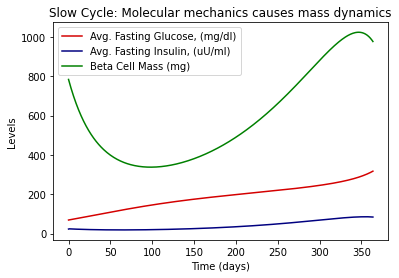

In [29]:
G_init = 90  # mg/dl plasma glucose level, initial
I_init = 6  # uU/ml plasma insulin level, initial
B_init = 800  # mg mass of Beta-islet cells in the pancrease, initial

d_zero = 0.05  #  1 / d Beta cell death rate at zero glucose
""" We change the insulin sensitivity dynamically during the sim through a multiplier. Each day, the 
value of S_i loses 1% of its current value"""
S_i    = 0.72  # ml / uU d Total insulin sensitivity
""" r_1 changes from 8.4 * 10**(-4) to 5.9 * 10**(-4) """
r_1 = 5.19 * 10**(-4)  # dl / mg d Linear constant modeling Beta cell replication and death
""" r_1 changes from 2.4 * 10**(-6) to 1.2 * 10**(-6) """
r_2 = 1.2 * 10**(-6)  # dl^2 / mg^2 d Quadratic constant modeling Beta cell replication and death

sigma = 43.2  # uU / ml d Maximal insulin secretion rate from Beta-islet cells
alpha = 20000  # mg^2 / dl^2 Apparent dissociation constant for glucose
k = 432  # 1 / d  Clearance constant  combined insulin uptake at liver and kidneys and insulin receptors

# params: initial Glucose level, initial Insulin level, initial Beta cell mass, insulin factor multiplier (optional), beta cell death rate multiplier (optional)
# the optional params at the end are multiplied with S_i and d_zero, respectively at the end of each cycle (~1 day).
# You can change those parameters and see how it impacts glucose metabolism. They are very sensitive, change by orders of 0.001
[ts, Gs, Is, Bs] = run_slow_timescale(G_init, I_init, B_init, .99, 1)

plt.figure(7)
plt.title('Slow Cycle: Molecular mechanics causes mass dynamics')
plt.plot(ts, Gs, red, ts, Is, blue, ts, Bs, green )
plt.xlabel('Time (days)')
plt.ylabel('Levels')
plt.legend(['Avg. Fasting Glucose, (mg/dl)', 'Avg. Fasting Insulin, (uU/ml)', 'Beta Cell Mass (mg)'])
# plt.show()
a = gc.collect()

#Bibliography
<a id="#Bibliography"></a>

1. Brian Topp, Keith Promislow, Gerda deVries, Robert M. Miura, Diane T. Finegood, J. A Model of B-Cell Mass, Insulin, and Glucose Kinetics: Pathways to Diabetes. theor. Biol. 2000. [https://doi.org/10.1006/jtbi.2000.2150](https://doi.org/10.1006/jtbi.2000.2150)

2. Tirosh, Amir and Shai, Iris and Tekes-Manova, Dorit and Israeli, Eran and Pereg, David and Shochat, Tzippora and Kochba, Ilan and Rudich, Assaf. Normal Fasting Plasma Glucose Levels and Type 2 Diabetes in Young Men. New England Journal of Medicine, 2005. [https://doi.org/10.1056/NEJMoa050080](https://doi.org/10.1056/NEJMoa050080)

3. Chen, C., Cohrs, C. M., Stertmann, J., Bozsak, R., & Speier, S. (2017). Human beta cell mass and function in diabetes: Recent advances in knowledge and technologies to understand disease pathogenesis. Molecular metabolism, 6(9), 943–957. [https://doi.org/10.1016/j.molmet.2017.06.019](https://doi.org/10.1016/j.molmet.2017.06.019)

4. Kilimnik, G., Jo, J., Periwal, V., Zielinski, M. C., & Hara, M. (2012). Quantification of islet size and architecture. Islets, 4(2), 167–172. [https://doi.org/10.4161/isl.19256](https://doi.org/10.4161/isl.19256)

5. Yoshifumi Saisho, Alexandra E. Butler, Erica Manesso, David Elashoff, Robert A. Rizza, Peter C. Butler. Diabetes Care Jan 2013, 36 (1) 111-117; [https://doi.org/10.2337/dc12-0421](https://doi.org/10.2337/dc12-0421)

6. Endocrine Physiology. In: Kibble JD, Halsey CR. eds. Medical Physiology: The Big Picture New York, NY: McGraw-Hill; 2014. http://accessmedicine.mhmedical.com/content.aspx?bookid=1291&sectionid=75577697. Accessed June 05, 2019.

7. Endocrine Functions of the Pancreas & Regulation of Carbohydrate Metabolism. In: Barrett KE, Barman SM, Brooks HL, Yuan JJ. eds. Ganong's Review of Medical Physiology, 26e New York, NY: McGraw-Hill; . http://accessmedicine.mhmedical.com/content.aspx?bookid=2525&sectionid=204296197. Accessed June 05, 2019.

8. Molina PE. eds. Endocrine Physiology, 5e New York, NY: McGraw-Hill; . http://accessmedicine.mhmedical.com/content.aspx?bookid=2343&sectionid=183488649. Accessed June 05, 2019.

9. Masharani U, German MS. Pancreatic Hormones and Diabetes Mellitus. In: Gardner DG, Shoback D. eds. Greenspan's Basic & Clinical Endocrinology, 10e New York, NY: McGraw-Hill; 


 